In [11]:
!pip install ipywidgets==7.4.2

     |████████████████████████████████| 111 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 40.2 MB/s eta 0:00:01


In [1]:
import os,sys
import os.path as osp

import json

import numpy as np
import cv2

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import glob
from PIL import Image


plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower

In [2]:
import torch
import torchvision
print(torch.__version__)

1.9.0+cu102


In [6]:
pwd

'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/MiVOS'

In [19]:
img_path = r'/playpen1/qiuyang/refined_segmentation/Oct_4_flownet2_and_stereo_data/Teli_5_rot'
pose_path = r'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/Teli_5_rot_openpose'
save_path = r'/playpen1/qiuyang/refined_segmentation/Oct_19_segmented_result/Oct_17_Flownet2CSS_Teli_5_6'
npy_path = r'/playpen1/qiuyang/refined_segmentation/Oct_17_Flownet_bg_mask/Oct_17_Flownet2CSS_Teli_5_6_bg_mask'
png_path = r'/playpen1/qiuyang/refined_segmentation/Oct_17_Flownet_bg_mask/Oct_17_Flownet2CSS_Teli_5_6_bg_mask_png'
# npy_path = r'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/background_mask_npy_resized/'
# png_path = r'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/background_mask_png/'

joint_path = r'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/Teli_5_rot_joints_mask_Oct_25'
overlay_path = r'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/Teli_5_rot_overlay_Oct_25'

begin_frame = 0
end_frame = 627
# end_frame = 627 # not include


# overlay_path = save_path + '_overlay'
# joint_path = save_path + '_joints_mask'
# for path in [overlay_path, joint_path]:
#     if not osp.isdir(path):
#         os.makedirs(path)        

fn_img = osp.join(img_path, 'F%05d_Teli_5.png')
fn_pose = osp.join(pose_path, 'F%05d_Teli_5_keypoints.json')
fn_mask = osp.join(joint_path, 'F%05d_Teli_5.png')
fn_overlay = osp.join(overlay_path, 'F%05d_Teli_5.png')
fn_npy = osp.join(npy_path,'F%05d_mask.npy')
fn_png = osp.join(png_path,'F%05d_mask.png')

In [7]:
# # draw skeleton
# openpose_joints = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],
#                    [1,8],[8,9],[9,10],[10,11],[8,12],[12,13],
#                    [13,14]]

# # draw skleton only once
# # for frame in tqdm(range(begin_frame, end_frame, skip_frame)):
# for frame in range(begin_frame, end_frame):
#     img = cv2.imread(fn_img%frame)
#     h,w = img.shape[:2]
#     mask = np.zeros_like(img)
#     with open(fn_pose%frame) as f:
#         data = json.load(f)
#     if len(data['people'])<1:
#         cv2.imwrite(fn_mask%frame, mask)
#         cv2.imwrite(fn_overlay%frame, img)
#         continue
        
#     pose = np.array(data['people'][0]['pose_keypoints_2d']).reshape(-1, 3) # !!!todo: detect multi person
#     int_pose = pose[:,:2].astype(np.int32)
#     for j1,j2 in openpose_joints:
#         (x1,y1),p1 = int_pose[j1], pose[j1,2]
#         (x2,y2),p2 = int_pose[j2], pose[j2,2]
#         if p1 < 0.5 or p2 < 0.5:
#             continue
#         cv2.line(mask, (x1,y1), (x2,y2), (255,255,255), 1)
#         cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 1)
#         cv2.imwrite(fn_mask%frame, mask)
#         cv2.imwrite(fn_overlay%frame, img)



NameError: name 'begin_frame' is not defined

In [22]:
# # draw skeleton Oct 25
# begin_frame = 0
# end_frame = 627
# joint_path = r'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/Teli_5_rot_joints_mask_Oct_25/'
# overlay_path = r'/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/Teli_5_rot_overlay_Oct_25/'
# for path in [joint_path, overlay_path]:
#     if not osp.isdir(path):
#         os.makedirs(path) 

# fn_mask = osp.join(joint_path, 'F%05d_Teli_5.png')
# fn_overlay = osp.join(overlay_path, 'F%05d_Teli_5.png')

# openpose_joints = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],
#                    [1,8],[8,9],[9,10],[10,11],[8,12],[12,13],
#                    [13,14]]

# # draw skleton only once
# # for frame in tqdm(range(begin_frame, end_frame, skip_frame)):
# for frame in range(begin_frame, end_frame):
#     img = cv2.imread(fn_img%frame)
#     h,w = img.shape[:2]
#     mask = np.zeros_like(img)
#     with open(fn_pose%frame) as f:
#         data = json.load(f)
    
#     # case: len < 1
#     if len(data['people'])<1:
#         cv2.imwrite(fn_mask%frame, mask)
#         cv2.imwrite(fn_overlay%frame, img)
#         continue
    
#     # case: len = 1
#     elif len(data['people']) == 1:
#         pose = np.array(data['people'][0]['pose_keypoints_2d']).reshape(-1, 3) # !!!todo: detect multi person
#         int_pose = pose[:,:2].astype(np.int32)
#         for j1,j2 in openpose_joints:
#             (x1,y1),p1 = int_pose[j1], pose[j1,2]
#             (x2,y2),p2 = int_pose[j2], pose[j2,2]
#             if p1 < 0.5 or p2 < 0.5:
#                 continue
#             cv2.line(mask, (x1,y1), (x2,y2), (255,255,255), 1)
#             cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 1)
#             cv2.imwrite(fn_mask%frame, mask)
#             cv2.imwrite(fn_overlay%frame, img)
#         continue
    
#     # case: len > 1
#     else:
#         pose = np.array(data['people'][0]['pose_keypoints_2d']).reshape(-1, 3) # !!!todo: detect multi person
#         x = pose[:, 0]
#         x = x[x!=0]
#         y = pose[:, 1]
#         y = y[y!=0]
#         width = max(x) - min(x)
#         height = max(y) - min(y)
#         if width < 100 or height < 100:
#             pose = np.array(data['people'][1]['pose_keypoints_2d']).reshape(-1, 3)

#         int_pose = pose[:,:2].astype(np.int32)
#         for j1,j2 in openpose_joints:
#             (x1,y1),p1 = int_pose[j1], pose[j1,2]
#             (x2,y2),p2 = int_pose[j2], pose[j2,2]
#             if p1 < 0.5 or p2 < 0.5:
#                 continue
#             cv2.line(mask, (x1,y1), (x2,y2), (255,255,255), 1)
#             cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 1)
#             cv2.imwrite(fn_mask%frame, mask)
#             cv2.imwrite(fn_overlay%frame, img)

In [7]:
!pwd

/playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation


In [8]:
!git clone https://github.com/hkchengrex/MiVOS.git

Cloning into 'MiVOS'...
remote: Enumerating objects: 299, done.
remote: Counting objects: 100% (299/299), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 299 (delta 110), reused 256 (delta 70), pack-reused 0
Receiving objects: 100% (299/299), 1.23 MiB | 23.27 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [13]:
!python download_model.py

Downloading...
From: https://drive.google.com/uc?id=19dfbVDndFkboGLHESi8DGtuxF1B21Nm8
To: /playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/MiVOS/saves/propagation_model.pth
100%|████████████████████████████████████████| 215M/215M [00:03<00:00, 61.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Lc1lI5-ix4WsCRdipACXgvS3G-o0lMoz
To: /playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/MiVOS/saves/fusion.pth
100%|████████████████████████████████████████| 164k/164k [00:00<00:00, 4.95MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HKwklVey3P2jmmdmrACFlkXtcvNxbKMM
To: /playpen1/qiuyang/refined_segmentation/Oct_7_skeleton_and_flow_segmentation/MiVOS/saves/s2m.pth
100%|████████████████████████████████████████| 159M/159M [00:04<00:00, 32.3MB/s]
Done.


In [7]:
import torchvision
import torchvision.transforms as transforms
from model.s2m.s2m_network import deeplabv3plus_resnet50 as S2M
fn_s2m_model = 'saves/s2m.pth'
device = torch.device('cuda')

im_mean = (124, 116, 104)

im_normalization = transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]
                )

inv_im_trans = transforms.Normalize(
                mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                std=[1/0.229, 1/0.224, 1/0.225])

def images_to_torch(frames, device):
    frames = torch.from_numpy(frames.transpose(0, 3, 1, 2)).float().unsqueeze(0)/255
    b, t, c, h, w = frames.shape
    for ti in range(t):
        frames[0, ti] = im_normalization(frames[0, ti])
    return frames.to(device)

(1224, 1024, 3)


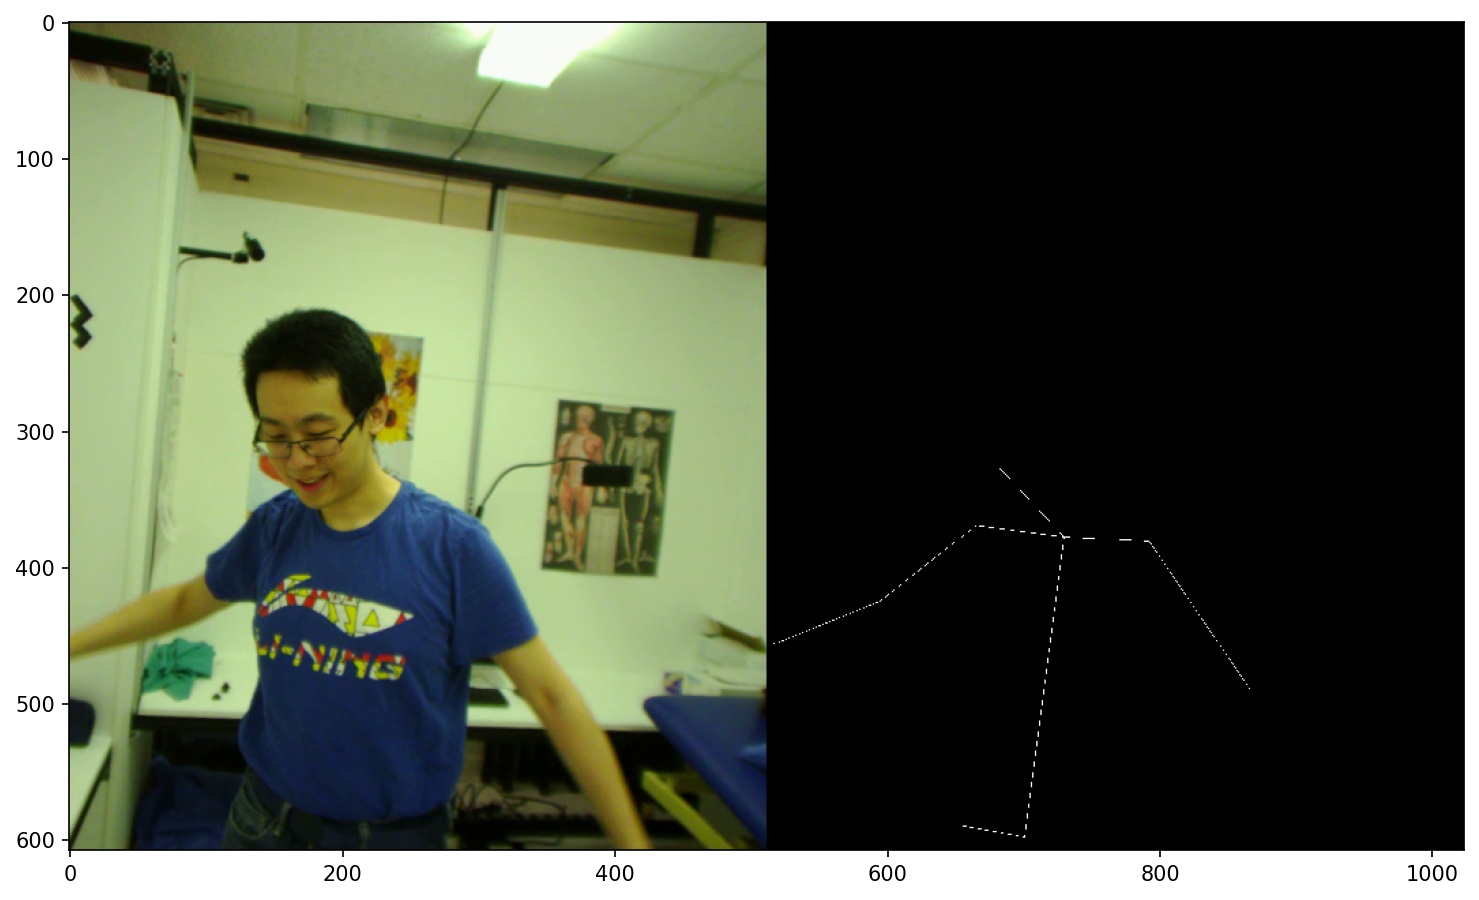

In [13]:
fid = 416
img = cv2.imread(fn_img%fid)[:,:,[2,1,0]].copy() # to RGB
print(img.shape)
img = cv2.resize(img, (512, 608)) # make w and h are both power of 16
mask = cv2.imread(fn_mask%fid)
mask = cv2.resize(mask, (512, 608), interpolation = cv2.INTER_NEAREST)
plt.imshow(np.concatenate((img, mask), 1))

In [14]:
tmp = np.expand_dims(img, 0) # add batch axis
t_img = images_to_torch(tmp, device)
t_img = t_img[0]
h, w = t_img.shape[-2:]
prev_mask = torch.zeros((1, 1, h, w), dtype=torch.float32, device=device)
p_srb = torch.from_numpy(mask[:,:,0]>200).unsqueeze(0).unsqueeze(0).to(device)
n_srb = torch.zeros_like(p_srb)
# npy = np.load(fn_npy%fid)
# n_srb = torch.from_numpy(npy).unsqueeze(0).unsqueeze(0).to(device)
inputs = torch.cat((t_img, prev_mask, p_srb, n_srb), 1)

In [15]:
s2m_saved = torch.load(fn_s2m_model)
s2m_model = S2M().cuda().eval()
s2m_model.load_state_dict(s2m_saved)

<All keys matched successfully>

In [16]:
with torch.no_grad():
    output = torch.sigmoid(s2m_model(inputs))

In [17]:
# print(label.max())
# print(label.min())
# print(label.shape)

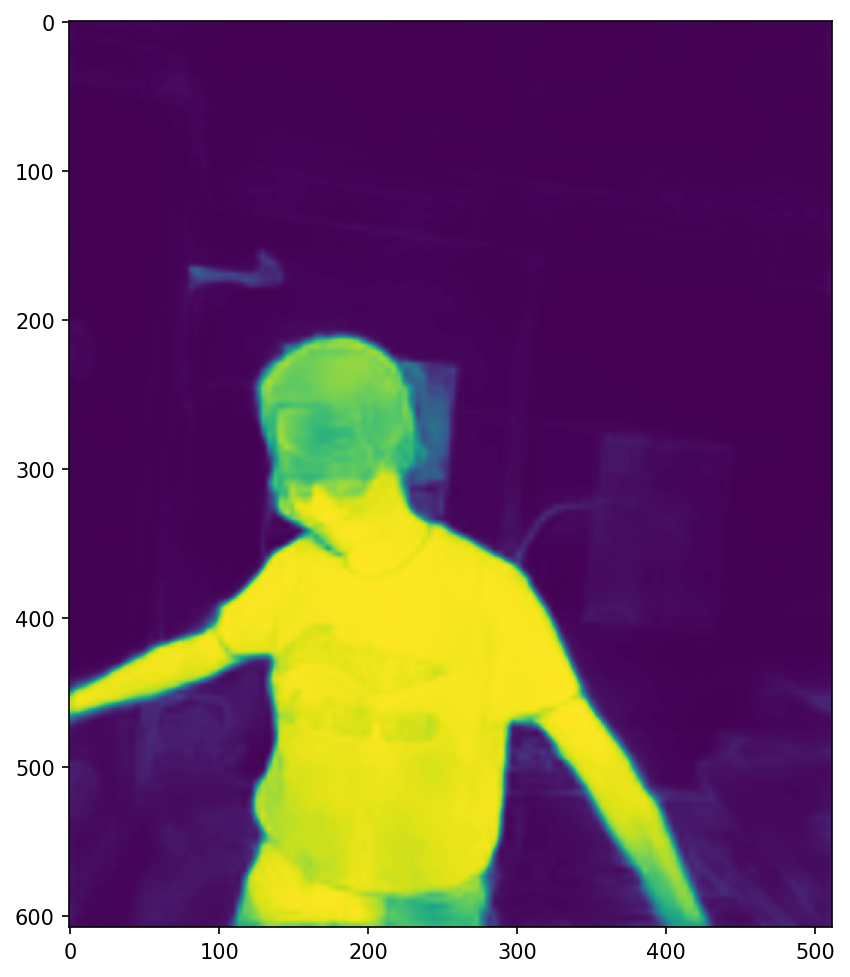

In [18]:
label = output.detach().cpu().squeeze().numpy()
plt.imshow(label)
# new_label = label * 255
# new_label = new_label.astype(np.uint8)
# new_label = cv2.threshold(new_label, 0, 255, cv2.THRESH_OTSU)
# # new_label = cv2.adaptiveThreshold(new_label, 255, 255, cv2.THRESH_OTSU)
# # plt.imshow(label)
# plt.imshow(new_label[1])

In [14]:
# #label_no_bg = label.copy()
# inputs = np.concatenate((label_no_bg, label),1)
# # plt.imshow(inputs)
# plt.imshow(label>0.5)


In [35]:
# process all frames
import cv2
label_path = save_path + '_label'
if not osp.isdir(label_path):
    os.makedirs(label_path)
fn_label = osp.join(label_path, 'F%05d_Teli_5.png')

# for frame in tqdm(range(begin_frame, end_frame, skip_frame)):
#for frame in tqdm(range(begin_frame, end_frame)):
for frame in range(0, 627):
    if not osp.isfile(fn_img%frame) or not osp.isfile(fn_mask%frame):
        continue
    
    img = cv2.imread(fn_img%frame)[:,:,[2,1,0]].copy() # to RGB
    img = cv2.resize(img, (512, 608)) # make w and h are both power of 16 # todo: use pad_divide_by

    mask = cv2.imread(fn_mask%frame)
    mask = cv2.resize(mask, (512, 608), interpolation = cv2.INTER_NEAREST)
    
    tmp = np.expand_dims(img, 0) # add batch axis
    t_img = images_to_torch(tmp, device)
    t_img = t_img[0]
    h, w = t_img.shape[-2:]
    prev_mask = torch.zeros((1, 1, h, w), dtype=torch.float32, device=device)
    p_srb = torch.from_numpy(mask[:,:,0]>200).unsqueeze(0).unsqueeze(0).to(device)
    
    npy = np.load(fn_npy%frame)
    n_srb = torch.from_numpy(npy).unsqueeze(0).unsqueeze(0).to(device)
#     n_srb = torch.zeros_like(p_srb)
    inputs = torch.cat((t_img, prev_mask, p_srb, n_srb), 1)

    with torch.no_grad():
        output = torch.sigmoid(s2m_model(inputs))

    label = output.detach().cpu().squeeze().numpy()
    
    label = cv2.resize(label, (512, 612)) # todo: use original resolution
    mask = label > 0.05 # !!! todo: find out real threshold
#     print(mask.shape)
    img = cv2.imread(fn_overlay%frame)
    img = cv2.resize(img, (512, 612))
    img = img.astype(np.int32)
#     img[:,:,0][mask] += 100
#     img[:,:,1][mask] += 100
    img[:,:,2][mask] += 100
    img[img>255]=255
    img = img.astype(np.uint8)
#     plt.imshow(img[:, :, [2,1,0]])
#     plt.show()
    cv2.imwrite(fn_label%frame, img)

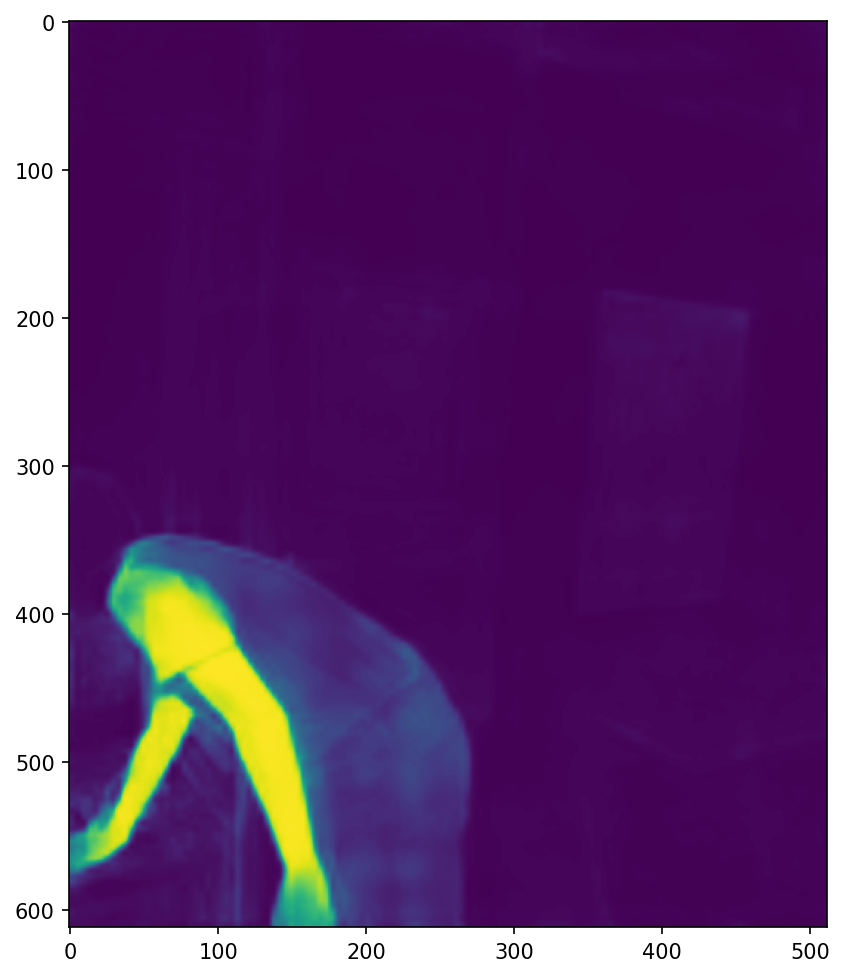

In [20]:
# Oct_25 generate prob map no bg
# process all frames
import cv2
new_save_path = r'/playpen1/qiuyang/refined_segmentation/Oct_25_Flownet2CSS_for_presentation/Oct_25_Flownet2CSS'
label_path = new_save_path + '_no_bg_probmap'
if not osp.isdir(label_path):
    os.makedirs(label_path)
fn_label = osp.join(label_path, 'F%05d_Teli_5.png')

for frame in range(0, 627):
    if not osp.isfile(fn_img%frame) or not osp.isfile(fn_mask%frame):
        continue
    
    img = cv2.imread(fn_img%frame)[:,:,[2,1,0]].copy() # to RGB
    img = cv2.resize(img, (512, 608)) # make w and h are both power of 16 # todo: use pad_divide_by
    
    mask = cv2.imread(fn_mask%frame)
    mask = cv2.resize(mask, (512, 608), interpolation = cv2.INTER_NEAREST)
    
    tmp = np.expand_dims(img, 0) # add batch axis
    t_img = images_to_torch(tmp, device)
    t_img = t_img[0]
    h, w = t_img.shape[-2:]
    prev_mask = torch.zeros((1, 1, h, w), dtype=torch.float32, device=device)
    p_srb = torch.from_numpy(mask[:,:,0]>200).unsqueeze(0).unsqueeze(0).to(device)
    
#     npy = np.load(fn_npy%frame)
#     n_srb = torch.from_numpy(npy).unsqueeze(0).unsqueeze(0).to(device)
    n_srb = torch.zeros_like(p_srb)
    inputs = torch.cat((t_img, prev_mask, p_srb, n_srb), 1)

    with torch.no_grad():
        output = torch.sigmoid(s2m_model(inputs))

    label = output.detach().cpu().squeeze().numpy()
    
    label = cv2.resize(label, (512, 612)) # todo: use original resolution
    plt.imsave(fn_label%frame, label)
    
#     mask = label > 0.05 # !!! todo: find out real threshold
#     mask = mask.astype(np.uint8)
#     plt.imsave(fn_label%frame, mask)
    
#     print(mask.shape)
#     img = cv2.imread(fn_overlay%frame)
#     img = cv2.resize(img, (512, 612))
#     img = img.astype(np.int32)
# #     img[:,:,0][mask] += 100
# #     img[:,:,1][mask] += 100
#     img[:,:,2][mask] += 100
#     img[img>255]=255
#     img = img.astype(np.uint8)
# #     plt.imshow(img[:, :, [2,1,0]])
# #     plt.show()
#     cv2.imwrite(fn_label%frame, img)

In [21]:
# Oct_25 generate prob map with bg
# process all frames
import cv2
new_save_path = r'/playpen1/qiuyang/refined_segmentation/Oct_25_Flownet2CSS_for_presentation/Oct_25_Flownet2CSS'
label_path = new_save_path + '_with_bg_probmap'
if not osp.isdir(label_path):
    os.makedirs(label_path)
fn_label = osp.join(label_path, 'F%05d_Teli_5.png')

for frame in range(0, 627):
    if not osp.isfile(fn_img%frame) or not osp.isfile(fn_mask%frame):
        continue
    
    img = cv2.imread(fn_img%frame)[:,:,[2,1,0]].copy() # to RGB
    img = cv2.resize(img, (512, 608)) # make w and h are both power of 16 # todo: use pad_divide_by
    
    mask = cv2.imread(fn_mask%frame)
    mask = cv2.resize(mask, (512, 608), interpolation = cv2.INTER_NEAREST)
    
    tmp = np.expand_dims(img, 0) # add batch axis
    t_img = images_to_torch(tmp, device)
    t_img = t_img[0]
    h, w = t_img.shape[-2:]
    prev_mask = torch.zeros((1, 1, h, w), dtype=torch.float32, device=device)
    p_srb = torch.from_numpy(mask[:,:,0]>200).unsqueeze(0).unsqueeze(0).to(device)
    
    npy = np.load(fn_npy%frame)
    n_srb = torch.from_numpy(npy).unsqueeze(0).unsqueeze(0).to(device)
#     n_srb = torch.zeros_like(p_srb)
    inputs = torch.cat((t_img, prev_mask, p_srb, n_srb), 1)

    with torch.no_grad():
        output = torch.sigmoid(s2m_model(inputs))

    label = output.detach().cpu().squeeze().numpy()
    
    label = cv2.resize(label, (512, 612)) # todo: use original resolution
    plt.imsave(fn_label%frame, label)
    
#     mask = label > 0.05 # !!! todo: find out real threshold
#     mask = mask.astype(np.uint8)
#     plt.imsave(fn_label%frame, mask)
    
#     print(mask.shape)
#     img = cv2.imread(fn_overlay%frame)
#     img = cv2.resize(img, (512, 612))
#     img = img.astype(np.int32)
# #     img[:,:,0][mask] += 100
# #     img[:,:,1][mask] += 100
#     img[:,:,2][mask] += 100
#     img[img>255]=255
#     img = img.astype(np.uint8)
# #     plt.imshow(img[:, :, [2,1,0]])
# #     plt.show()
#     cv2.imwrite(fn_label%frame, img)

In [22]:
# Oct_25 generate thresholded mask
import cv2
threshold_mask_path = save_path + '_threshold_mask'
if not osp.isdir(threshold_mask_path):
    os.makedirs(threshold_mask_path)
fn_label = osp.join(threshold_mask_path, 'F%05d_Teli_5.png')

# for frame in tqdm(range(begin_frame, end_frame, skip_frame)):
#for frame in tqdm(range(begin_frame, end_frame)):
for frame in range(0, 627):
    if not osp.isfile(fn_img%frame) or not osp.isfile(fn_mask%frame):
        continue
    
    img = cv2.imread(fn_img%frame)[:,:,[2,1,0]].copy() # to RGB
    img = cv2.resize(img, (512, 608)) # make w and h are both power of 16 # todo: use pad_divide_by

    mask = cv2.imread(fn_mask%frame)
    mask = cv2.resize(mask, (512, 608), interpolation = cv2.INTER_NEAREST)
    
    tmp = np.expand_dims(img, 0) # add batch axis
    t_img = images_to_torch(tmp, device)
    t_img = t_img[0]
    h, w = t_img.shape[-2:]
    prev_mask = torch.zeros((1, 1, h, w), dtype=torch.float32, device=device)
    p_srb = torch.from_numpy(mask[:,:,0]>200).unsqueeze(0).unsqueeze(0).to(device)
    
    npy = np.load(fn_npy%frame)
    n_srb = torch.from_numpy(npy).unsqueeze(0).unsqueeze(0).to(device)
#     n_srb = torch.zeros_like(p_srb)
    inputs = torch.cat((t_img, prev_mask, p_srb, n_srb), 1)

    with torch.no_grad():
        output = torch.sigmoid(s2m_model(inputs))

    label = output.detach().cpu().squeeze().numpy()
    
    label = cv2.resize(label, (512, 612)) # todo: use original resolution
    new_label = label * 255
    new_label = new_label.astype(np.uint8)
    new_label = cv2.threshold(new_label, 0, 255, cv2.THRESH_OTSU)
    
    cv2.imwrite(fn_label%frame, new_label[1])

In [45]:
osp.isfile(fn_mask%frame)

False

In [55]:
osp.isfile(fn_mask%frame)

True